In [1]:
%pylab inline
import ete3

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
#go to output file 
%cd ../Example/

/Users/silas/Documents/GitHub/Tutorial/Example


In [3]:
T= ete3.Tree('genomes/tree/gtdbtk.bac120.nwk')

In [4]:
# create a short label for each genome
Tax= pd.read_table('Results/taxonomy.tsv',index_col=0)
Labels=Tax.ffill(axis=1).species.copy()
Labels.loc[Tax.species.isnull()]+= ' '+ Labels.index[Tax.species.isnull()]


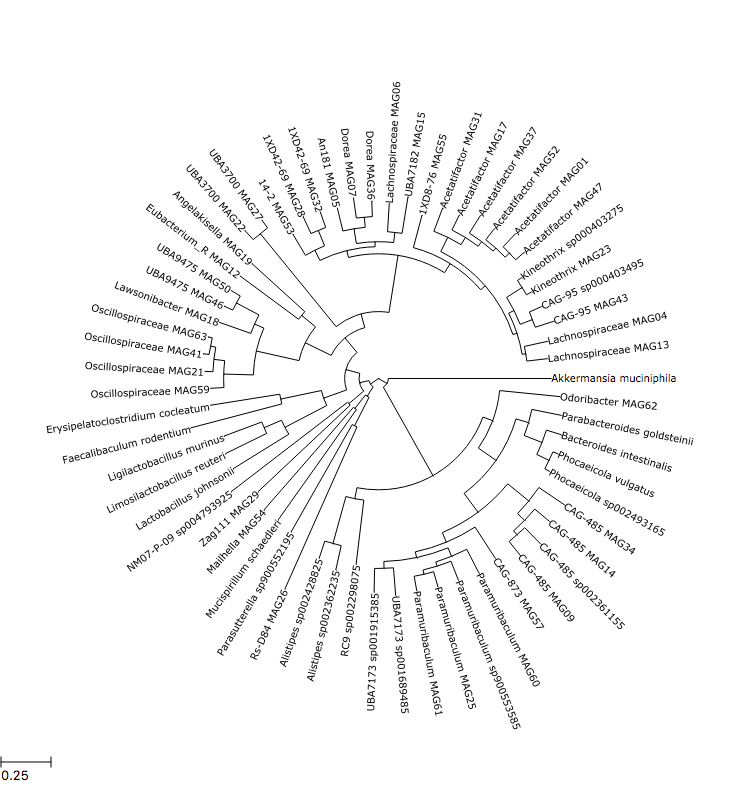

In [5]:
def layout(node):
    
    node.img_style["size"] = 0
    
    if node.is_leaf():

        L= ete3.TextFace(Labels.loc[node.name])
        ete3.add_face_to_node(L, node, 0, position="branch-right")
        


ts=ete3.TreeStyle()
ts.mode='c'
ts.show_leaf_name=False
ts.scale = 200
T.render('%%inline',tree_style=ts,layout=layout)